<a href="https://colab.research.google.com/github/anky19698/Cricket_Analytics/blob/main/Cricket_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Match Summary: Innings Progression

In [43]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [4]:
deliveries = pd.read_csv('/content/deliveries_output.csv')

In [3]:
matches = pd.read_csv('/content/matches_output.csv')

In [78]:
df = deliveries.copy()
mdf = matches.copy()

In [87]:
mdf.head()

,matchId,outcome,event,date,date1,date2,gender,reserve_umpire,umpire1,umpire2,...,team2,winner_runs,balls_per_over,player_of_match,neutralvenue,method,winner,match_number,eliminator,winner_wickets
0,1082591,normal,Indian Premier League,2017-04-05,NaN,NaN,male,N Pandit,AY Dandekar,NJ Llong,...,Royal Challengers Bangalore,35.0,6,['Yuvraj Singh'],NaN,NaN,Sunrisers Hyderabad,1.0,NaN,NaN
1,1082592,normal,Indian Premier League,2017-04-06,NaN,NaN,male,Navdeep Singh,A Nand Kishore,S Ravi,...,Mumbai Indians,NaN,6,['SPD Smith'],NaN,NaN,Rising Pune Supergiant,2.0,NaN,7.0
2,1082593,normal,Indian Premier League,2017-04-07,NaN,NaN,male,K Srinivasan,Nitin Menon,CK Nandan,...,Kolkata Knight Riders,NaN,6,['CA Lynn'],NaN,NaN,Kolkata Knight Riders,3.0,NaN,10.0
3,1082594,normal,Indian Premier League,2017-04-08,NaN,NaN,male,R Pandit,AK Chaudhary,C Shamshuddin,...,Rising Pune Supergiant,NaN,6,['GJ Maxwell'],NaN,NaN,Kings XI Punjab,4.0,NaN,6.0
4,1082595,normal,Indian Premier League,2017-04-08,NaN,NaN,male,Navdeep Singh,S Ravi,VK Sharma,...,Delhi Daredevils,15.0,6,['KM Jadhav'],NaN,NaN,Royal Challengers Bangalore,5.0,NaN,NaN


In [88]:
df = pd.merge(df, mdf, on='matchId')

In [90]:
df.columns

Index(['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team',
       'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes', 'Penalty',
       'dismissal_kind', 'player_dismissed', 'fielder', 'total_runs',
       'outcome', 'event', 'date', 'date1', 'date2', 'gender',
       'reserve_umpire', 'umpire1', 'umpire2', 'match_referee', 'tv_umpire',
       'season', 'venue', 'city', 'toss_decision', 'toss_winner', 'team1',
       'team2', 'winner_runs', 'balls_per_over', 'player_of_match',
       'neutralvenue', 'method', 'winner', 'match_number', 'eliminator',
       'winner_wickets'],
      dtype='object')

In [7]:
matchId = 1082591

In [91]:
df['total_runs'] = df['batsman_runs'] + df['extras']

In [119]:
def match_summary(df, matchId):

  # Filter by MatchId

  df = df[df['matchId'] == matchId]

  # Separate Innings

  df1 = df[df['inning'] == 1]
  df2 = df[df['inning'] == 2]
  df1.reset_index(inplace = True, drop = True)
  df2.reset_index(inplace = True, drop = True)

  # Find Cumulative Sum

  df1['cum_runs'] = 0
  runs_count = 0
  for i in range(len(df1)):
    runs_count += df1['total_runs'][i]
    df1['cum_runs'][i] = runs_count


  df2['cum_runs'] = 0
  runs_count = 0
  for i in range(len(df2)):
    runs_count += df2['total_runs'][i]
    df2['cum_runs'][i] = runs_count

  # Find Wicket Points

  wkt1 = list(df1[~df1['player_dismissed'].isna()].index)
  wkt2 = list(df2[~df2['player_dismissed'].isna()].index)
  wkt1_runs = list(df1[~df1['player_dismissed'].isna()].cum_runs)
  wkt2_runs = list(df2[~df2['player_dismissed'].isna()].cum_runs)

  ball_no_inning1 = [i for i in range(1, len(df1)+1)]
  ball_no_inning2 = [i for i in range(1, len(df2)+1)]

  team1 = df1['batting_team'][0]
  team2 = df2['batting_team'][0]

  plt.figure(figsize=(16, 10))

  # Plot Balls vs Runs for Each Innings

  plt.plot(ball_no_inning1, df1.cum_runs, linewidth = 2, label = team1 + " Score: " + str(df1.cum_runs.iloc[-1]) + "/" + str(len(wkt1)))
  plt.plot(ball_no_inning2, df2.cum_runs, linewidth = 2, label = team2 + " Score: " + str(df2.cum_runs.iloc[-1]) + "/" + str(len(wkt2)))
  plt.legend()

  # Phases

  plt.axvline(x = 36, ls = '--', c='g')
  plt.axvline(x = 90, ls = '--', c='g')

  plt.text(16,1.01, 'Powerplay')
  plt.text(60,1.01, 'Middle')
  plt.text(105,1.01, 'Death')

  # Wickets

  plt.scatter(wkt1, wkt1_runs, s=100)
  plt.scatter(wkt2, wkt2_runs, s=100)

  # Plot Naming

  plt.xlabel("Balls")
  plt.ylabel("Runs Scored")
  plt.title(f"Match Summary - Innings Progression \n IPL {df1.season[0]}: {team1} vs {team2}  \n {df1.venue[0]}, {df1.city[0]}")

  plt.show()


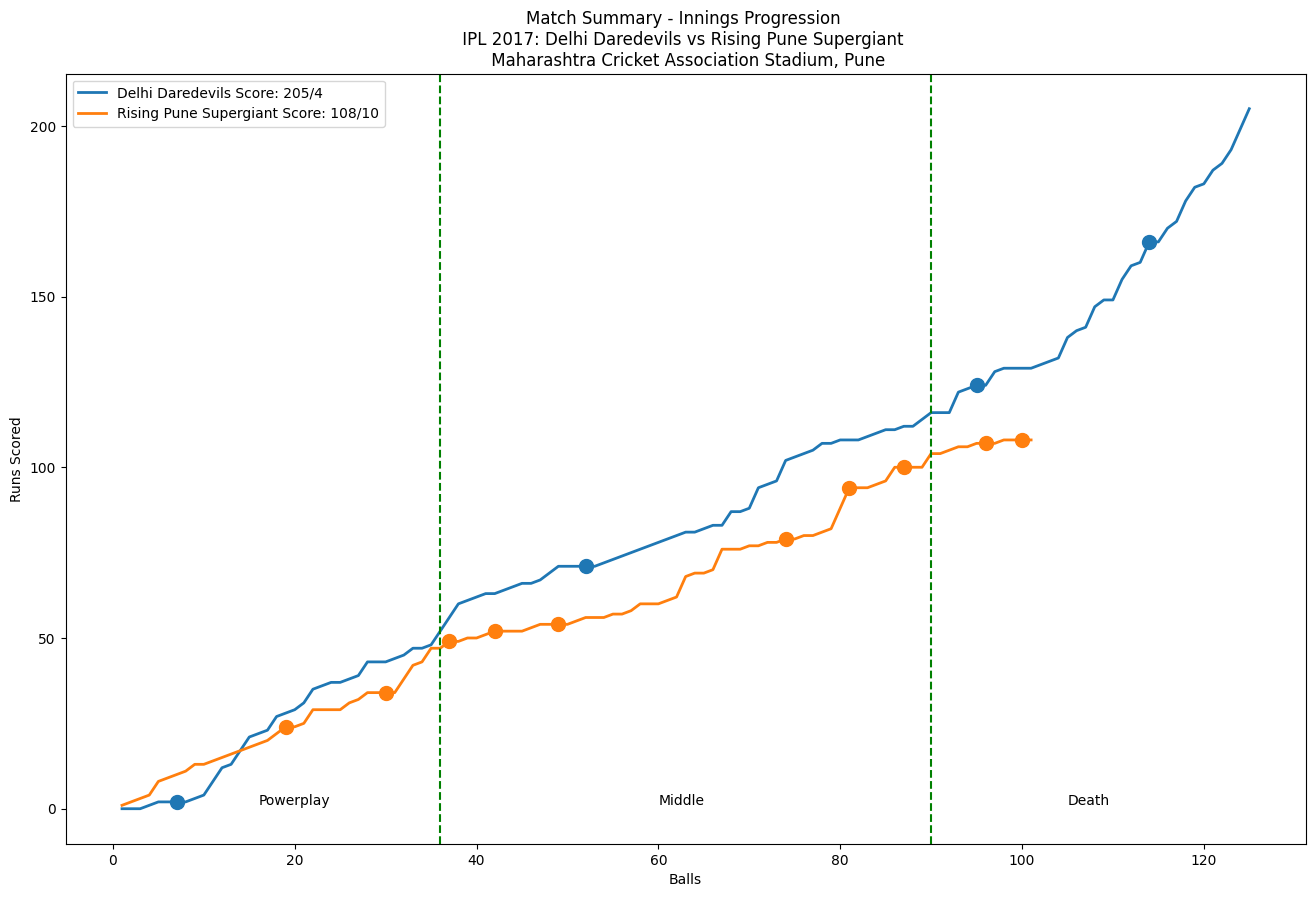

In [120]:
match_summary(df, 1082599)